In [10]:
import glob
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
json_files = glob.glob('./results/*.json')
json_file_names = [os.path.basename(file) for file in json_files]

print(json_file_names)

['result_1.json', 'result_2.json', 'result_3.json', 'result_4.json', 'result_5.json']


In [7]:
json_data = []

for file in json_files:
    with open(file, 'r') as json_file:
        data = json.load(json_file)
        json_data.append(data)

df = pd.DataFrame(json_data)
print(df)

     model  train_time  inference_time  relative_accuracy  accuracy
0  Model_1        6.38          0.5026               0.61      0.88
1  Model_2        1.76          0.9460               0.67      0.77
2  Model_3        8.64          0.1901               0.65      0.95
3  Model_4        9.16          0.8491               0.80      0.86
4  Model_5        1.14          0.8762               0.96      0.94


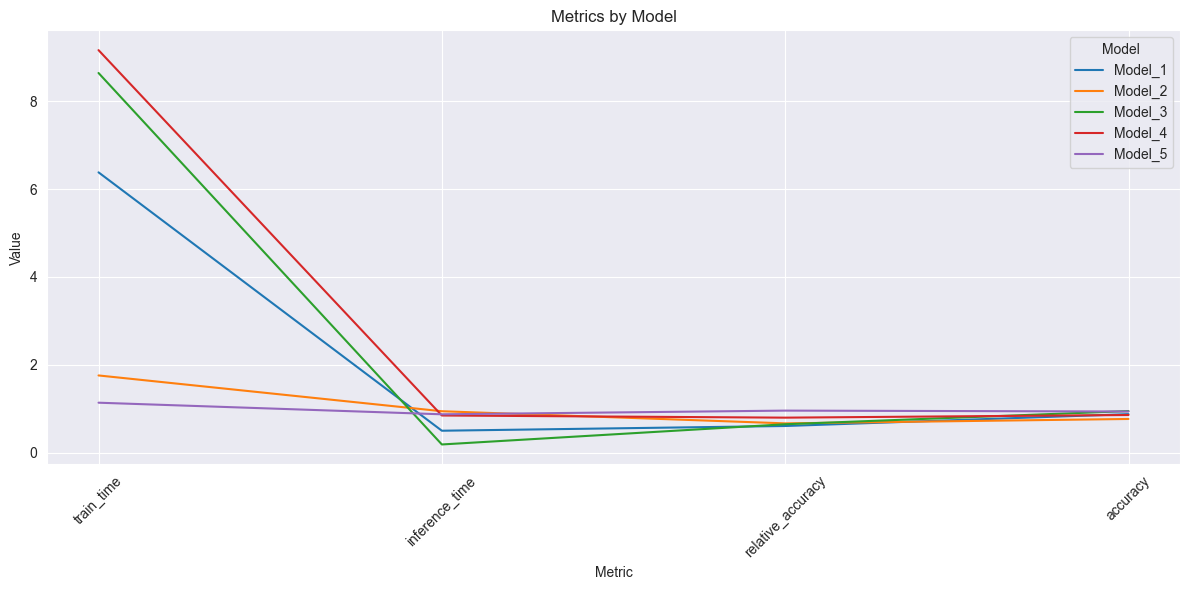

In [16]:
df_melted = pd.melt(df, id_vars=["model"], var_name="metric", value_name="value")

plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")
# sns.set_style("whitegrid")

sns.lineplot(data=df_melted, x="metric", y="value", hue="model", markers=True)

plt.title('Metrics by Model')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Model', loc='best')
plt.tight_layout()
plt.show()